# **Fashion MNIST Image Classification Using CNN with TensorFlow**

In this project, we will classify Fashion-MNIST dataset using Convolutional Neural Networks with TensorFlow.</p>


## Import Necessary Libraries

In [14]:
import numpy as np
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPool2D, BatchNormalization, Dropout
from sklearn.metrics import classification_report, confusion_matrix

In [15]:
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    for gpu in gpus:
        print("Name:", gpu.name, "  Type:", gpu.device_type)
else:
    print("No GPU devices found")

Name: /physical_device:GPU:0   Type: GPU


In [16]:
# Function for showing the image
def show_data(data_sample):
    plt.imshow(data_sample[0].numpy(), cmap='gray')
    plt.title('y = '+ str(data_sample[1]))

## Prepare Dataset

In [17]:
# Load FashionMNIST dataset
fashion_mnist = tf.keras.datasets.fashion_mnist
(X_train, y_train), (X_val, y_val) = fashion_mnist.load_data()

In [18]:
# Normalize the data
X_train, X_val = X_train / 255.0, X_val / 255.0

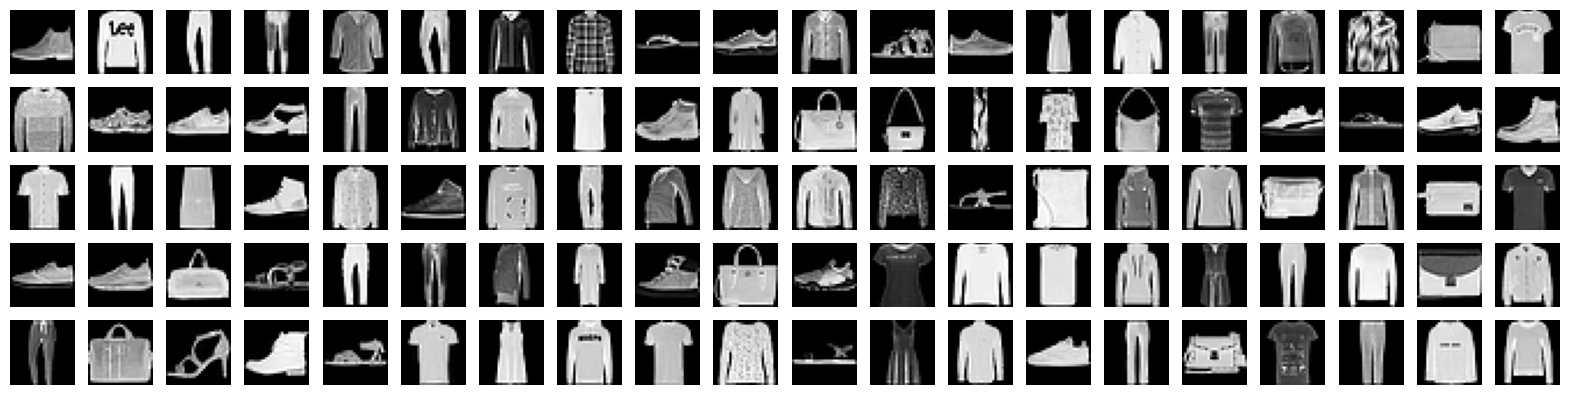

In [19]:
plt.figure(figsize=(20, 20))
for i in range(100):  # Plot the first 100 images
    plt.subplot(20, 20, i + 1)
    plt.imshow(X_val[i], cmap='gray')
    plt.axis('off')
plt.show()

## Create Convolutional Neural Network

In [20]:
model = tf.keras.Sequential([    
    Conv2D(32, kernel_size=(3, 3), strides=(1, 1), padding='same', activation='relu', input_shape=(28, 28, 1)),
    BatchNormalization(),

    MaxPool2D(pool_size=(2, 2), strides=(2, 2)),

    Conv2D(64, kernel_size=(3, 3), strides=(1, 1), padding='valid', activation='relu'),
    BatchNormalization(),

    MaxPool2D(pool_size=(2, 2), strides=(2, 2)),

    Flatten(),
    Dense(600, activation='relu'),
    Dropout(0.25),
    
    Dense(120, activation='relu'),

    Dense(10, activation='softmax')
])

In [21]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.001) # Stochastic gradient descent
criterion = tf.keras.losses.sparse_categorical_crossentropy # Cross-entropy loss
model.compile(loss=criterion, optimizer=optimizer, metrics=['accuracy']) # Compile the model
model.summary() # Print model summary

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 batch_normalization_2 (Batc  (None, 28, 28, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 12, 12, 64)        18496     
                                                                 
 batch_normalization_3 (Batc  (None, 12, 12, 64)       256       
 hNormalization)                                                 
                                                      

## Model Training

In [22]:
history = model.fit(X_train, y_train, batch_size=100, epochs=30, validation_data=(X_val, y_val))

Epoch 1/30
600/600 [==============================] - 5s 7ms/step - loss: 0.8841 - accuracy: 0.6977 - val_loss: 0.6374 - val_accuracy: 0.7952
Epoch 2/30
600/600 [==============================] - 4s 6ms/step - loss: 0.5593 - accuracy: 0.8000 - val_loss: 0.4687 - val_accuracy: 0.8377
Epoch 3/30
600/600 [==============================] - 4s 6ms/step - loss: 0.4891 - accuracy: 0.8252 - val_loss: 0.4304 - val_accuracy: 0.8490
Epoch 4/30
600/600 [==============================] - 4s 6ms/step - loss: 0.4454 - accuracy: 0.8396 - val_loss: 0.4061 - val_accuracy: 0.8578
Epoch 5/30
600/600 [==============================] - 4s 6ms/step - loss: 0.4221 - accuracy: 0.8491 - val_loss: 0.3868 - val_accuracy: 0.8631
Epoch 6/30
600/600 [==============================] - 4s 6ms/step - loss: 0.3980 - accuracy: 0.8565 - val_loss: 0.3738 - val_accuracy: 0.8674
Epoch 7/30
600/600 [==============================] - 4s 6ms/step - loss: 0.3818 - accuracy: 0.8627 - val_loss: 0.3664 - val_accuracy: 0.8700
Epoch 

## Model Evaluation

Plot cost and accuracy

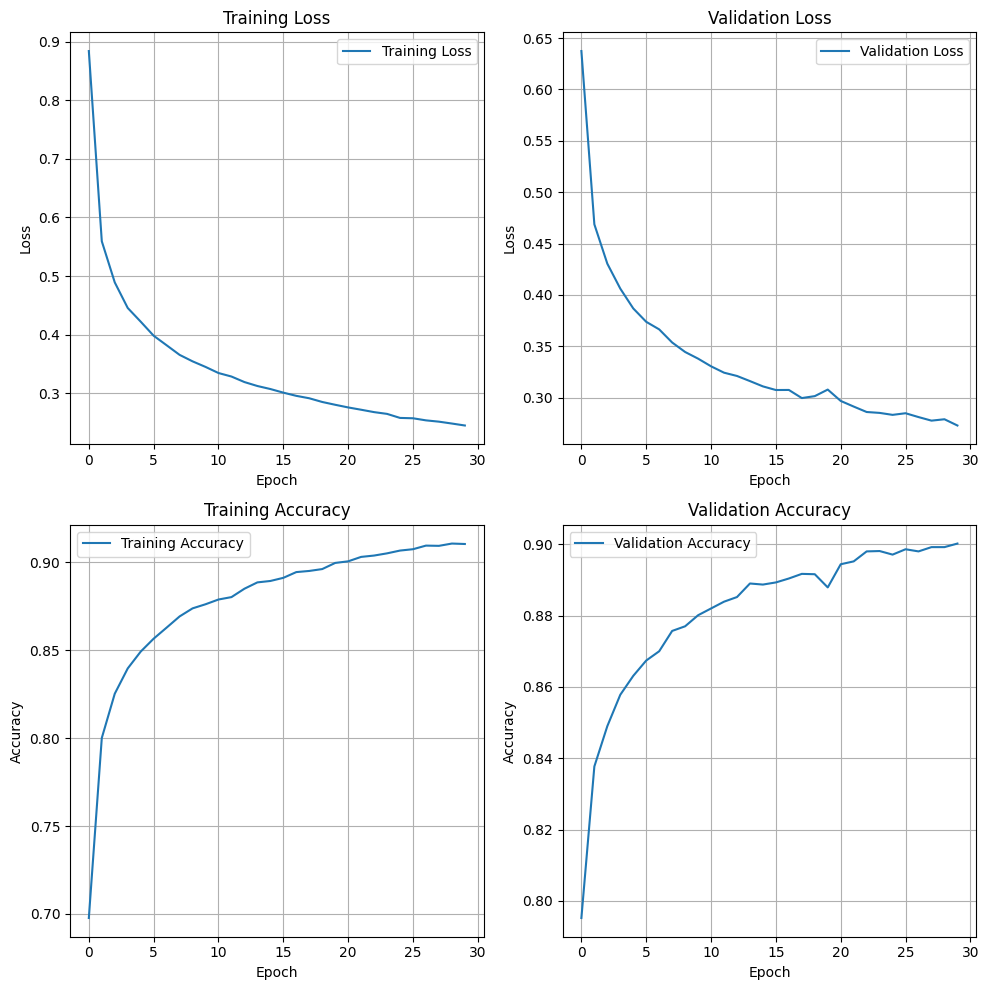

In [23]:
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

# Plot training loss
axs[0, 0].plot(history.history['loss'], label='Training Loss')
axs[0, 0].set_xlabel('Epoch')
axs[0, 0].set_ylabel('Loss')
axs[0, 0].set_title('Training Loss')
axs[0, 0].legend()
axs[0, 0].grid(True)

# Plot validation loss
axs[0, 1].plot(history.history['val_loss'], label='Validation Loss')
axs[0, 1].set_xlabel('Epoch')
axs[0, 1].set_ylabel('Loss')
axs[0, 1].set_title('Validation Loss')
axs[0, 1].legend()
axs[0, 1].grid(True)

# Plot training accuracy
axs[1, 0].plot(history.history['accuracy'], label='Training Accuracy')
axs[1, 0].set_xlabel('Epoch')
axs[1, 0].set_ylabel('Accuracy')
axs[1, 0].set_title('Training Accuracy')
axs[1, 0].legend()
axs[1, 0].grid(True)

# Plot validation accuracy
axs[1, 1].plot(history.history['val_accuracy'], label='Validation Accuracy')
axs[1, 1].set_xlabel('Epoch')
axs[1, 1].set_ylabel('Accuracy')
axs[1, 1].set_title('Validation Accuracy')
axs[1, 1].legend()
axs[1, 1].grid(True)

plt.tight_layout()
plt.show()

Print classification report

In [24]:
# Predict labels for validation set
y_pred = model.predict(X_val)
y_pred_classes = np.argmax(y_pred, axis=1)

# Generate classification report
print(classification_report(y_val, y_pred_classes))

313/313 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

           0       0.83      0.88      0.85      1000
           1       0.99      0.97      0.98      1000
           2       0.82      0.85      0.84      1000
           3       0.89      0.92      0.91      1000
           4       0.84      0.83      0.84      1000
           5       0.98      0.97      0.97      1000
           6       0.76      0.67      0.72      1000
           7       0.95      0.96      0.95      1000
           8       0.97      0.98      0.98      1000
           9       0.96      0.96      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



Display confusion matrix

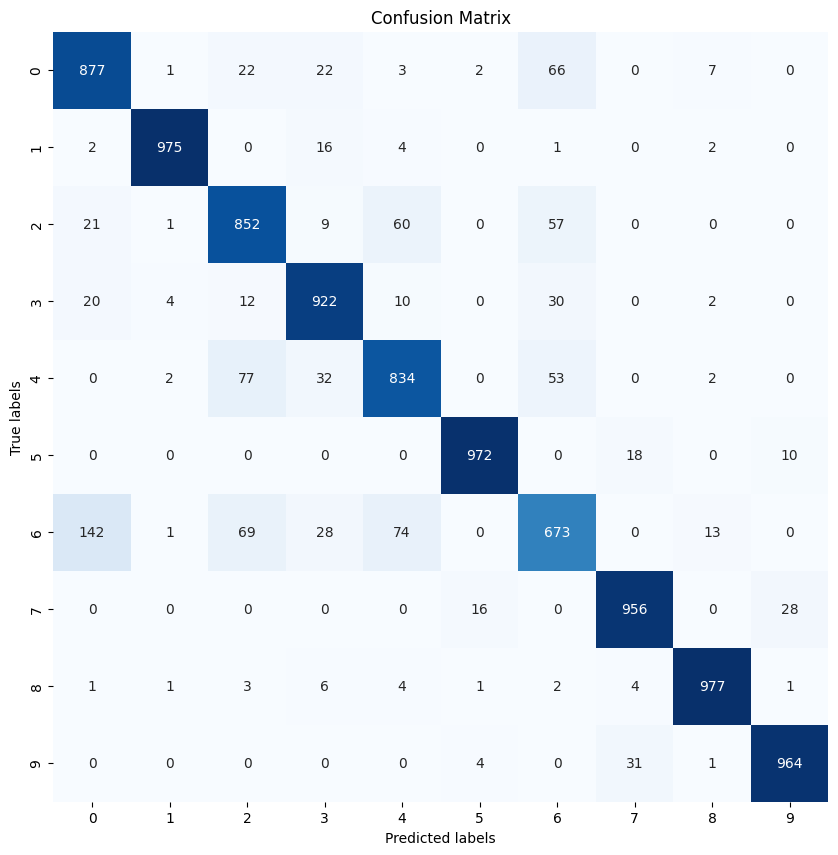

In [25]:
# Generate confusion matrix
conf_matrix = confusion_matrix(y_val, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(10, 10))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

## Export Trained Model

In [26]:
## Export Trained Model
model.save('models/fasion_cnn_tf')

INFO:tensorflow:Assets written to: models/fasion_cnn_tf\assets


INFO:tensorflow:Assets written to: models/fasion_cnn_tf\assets
